In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
!unzip gdrive/My\ Drive/NYC_data/Copy\ of\ trip_fare_4.csv

Archive:  gdrive/My Drive/NYC_data/Copy of trip_fare_4.csv.zip
  inflating: trip_fare_4.csv         


In [3]:
!unzip gdrive/My\ Drive/NYC_data/Copy\ of\ trip_data_4.csv

Archive:  gdrive/My Drive/NYC_data/Copy of trip_data_4.csv.zip
  inflating: trip_data_4.csv         


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
geolocator = Nominatim()
from scipy.stats.mstats import winsorize
import numpy as np
import datetime as dt
import scipy.stats as stats
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [2]:
import pandas as pd
df_fare=pd.read_csv('trip_fare_4.csv')
df_fare

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20
...,...,...,...,...,...,...,...,...,...,...,...
15100463,D4A54111A17ADEAFF0BFC77E1D3BBE30,8E2A9E6F9B918A88E4A75FAD48FACE2F,VTS,2013-04-16 18:02:00,CRD,8.0,1.0,0.5,2.70,0.00,12.20
15100464,75EE48442C316B274F59F224CDEEE38C,4264B81A61530FC7EB135C06D7A2B125,VTS,2013-04-16 17:52:00,CSH,12.0,1.0,0.5,0.00,0.00,13.50
15100465,A464409947749791C973AA66750DB237,C0EE8542372531D13C6EC6320D66031D,VTS,2013-04-16 17:19:00,CSH,52.0,0.0,0.5,0.00,5.33,57.83
15100466,643CD637EB15F8F96ACA9CD48F1FAC8C,7BD1FE00C488CF864DC5CBD85454C5CA,VTS,2013-04-16 17:52:00,CSH,12.5,1.0,0.5,0.00,0.00,14.00


In [ ]:
for i in df_fare.columns:
  print(i)
  print('--------------------------')
  print(df_fare[i].value_counts())

medallion
--------------------------
19E063791B0DF5A558B8488180DDAB67    2098
20BA941F62CC07F1FA3EF3E122B1E9B2    2035
75EE5A7E8B24FD2B2FB715955834C524    1993
0C9C589C0AD57ECCB633CB90A33DC37A    1988
9F1FEF916240E64AD4EC5B7883E6A435    1962
                                    ... 
62F3AEC2A2B8B2A959D67BC93764736C       1
61BE25B4D150EE25E9A1F0988597999E       1
AAE1062C9AE969E989A1850048816D3B       1
19427F3EA180AEF220CD4E568E2C476E       1
433C9664ECA5D431CFE58CCAEFA25917       1
Name: medallion, Length: 13464, dtype: int64
 hack_license
--------------------------
D85749E8852FCC66A990E40605607B2F    1612
51C1BE97280A80EBFA8DAD34E1956CF6    1600
3D757E111C78F5CAC83D44A92885D490    1508
5FBB8BB5329B9E865727E4777F8CE91F    1449
3AAB94CA53FE93A64811F65690654649    1411
                                    ... 
B9ACB814ECFDDF5CEB18EFDD215FA118       1
E9B834C8011A9917D1174ADDC8040559       1
AB7A451309BBEAEF35F550DBC4E3F879       1
8828E6781F2AEC3C817759780FF26820       1
5C3094CA3650B69F

In [ ]:
df_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100468 entries, 0 to 15100467
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   medallion         object 
 1    hack_license     object 
 2    vendor_id        object 
 3    pickup_datetime  object 
 4    payment_type     object 
 5    fare_amount      float64
 6    surcharge        float64
 7    mta_tax          float64
 8    tip_amount       float64
 9    tolls_amount     float64
 10   total_amount     float64
dtypes: float64(6), object(5)
memory usage: 1.2+ GB


In [ ]:
df_fare.describe

<bound method NDFrame.describe of                                  medallion                      hack_license  \
0         91F6EB84975BBC867E32CB113C7C2CD5  AD8751110E6292079EB10EB9481FE1A6   
1         EC34CD1B3797DFAFF3FE099BA87B6656  8FE6A4AEDF89B6B4E19D2377FD3FB7D7   
2         C1B9DA774DC2BBC6DE27CE994E7F44A0  E1B595FD55E4C82C1E213EB17438107A   
3         9BA84250355AB3FC031C9252D395BF8A  16BB0D96A0DCC853AEC7F55C8D6C71E0   
4         205A696DF62AD03C88DA8C5EC5248639  579C41EA5EC846F8B641A42F9EE3E855   
...                                    ...                               ...   
15100463  D4A54111A17ADEAFF0BFC77E1D3BBE30  8E2A9E6F9B918A88E4A75FAD48FACE2F   
15100464  75EE48442C316B274F59F224CDEEE38C  4264B81A61530FC7EB135C06D7A2B125   
15100465  A464409947749791C973AA66750DB237  C0EE8542372531D13C6EC6320D66031D   
15100466  643CD637EB15F8F96ACA9CD48F1FAC8C  7BD1FE00C488CF864DC5CBD85454C5CA   
15100467  72F95914C2F6FBFEAAB9FBFFE70CFE17  BBACEE2F3D15666652AE154F60AF7550   

     

In [3]:
df_data=pd.read_csv('trip_data_4.csv')
df_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.50,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.60,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.60,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.90,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.60,-74.006371,40.744755,-73.961662,40.761082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15100463,D4A54111A17ADEAFF0BFC77E1D3BBE30,8E2A9E6F9B918A88E4A75FAD48FACE2F,VTS,1,NaN,2013-04-16 18:02:00,2013-04-16 18:10:00,1,480,1.61,-73.967682,40.792694,-73.976959,40.771477
15100464,75EE48442C316B274F59F224CDEEE38C,4264B81A61530FC7EB135C06D7A2B125,VTS,1,NaN,2013-04-16 17:52:00,2013-04-16 18:10:00,1,1080,1.61,-73.977966,40.752522,-73.990532,40.766548
15100465,A464409947749791C973AA66750DB237,C0EE8542372531D13C6EC6320D66031D,VTS,2,NaN,2013-04-16 17:19:00,2013-04-16 18:11:00,1,3120,18.26,-73.781235,40.646683,-73.982338,40.762943
15100466,643CD637EB15F8F96ACA9CD48F1FAC8C,7BD1FE00C488CF864DC5CBD85454C5CA,VTS,1,NaN,2013-04-16 17:52:00,2013-04-16 18:08:00,2,960,2.67,-73.979912,40.734901,-73.981934,40.763092


In [ ]:
for i in df_data.columns:
  print(i)
  print('--------------------------')
  print(df_data[i].value_counts())

medallion
--------------------------
19E063791B0DF5A558B8488180DDAB67    2098
20BA941F62CC07F1FA3EF3E122B1E9B2    2035
75EE5A7E8B24FD2B2FB715955834C524    1993
0C9C589C0AD57ECCB633CB90A33DC37A    1988
9F1FEF916240E64AD4EC5B7883E6A435    1962
                                    ... 
62F3AEC2A2B8B2A959D67BC93764736C       1
61BE25B4D150EE25E9A1F0988597999E       1
AAE1062C9AE969E989A1850048816D3B       1
19427F3EA180AEF220CD4E568E2C476E       1
433C9664ECA5D431CFE58CCAEFA25917       1
Name: medallion, Length: 13464, dtype: int64
 hack_license
--------------------------
D85749E8852FCC66A990E40605607B2F    1612
51C1BE97280A80EBFA8DAD34E1956CF6    1600
3D757E111C78F5CAC83D44A92885D490    1508
5FBB8BB5329B9E865727E4777F8CE91F    1449
3AAB94CA53FE93A64811F65690654649    1411
                                    ... 
B9ACB814ECFDDF5CEB18EFDD215FA118       1
E9B834C8011A9917D1174ADDC8040559       1
AB7A451309BBEAEF35F550DBC4E3F879       1
8828E6781F2AEC3C817759780FF26820       1
5C3094CA3650B69F

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100468 entries, 0 to 15100467
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   medallion            object 
 1    hack_license        object 
 2    vendor_id           object 
 3    rate_code           int64  
 4    store_and_fwd_flag  object 
 5    pickup_datetime     object 
 6    dropoff_datetime    object 
 7    passenger_count     int64  
 8    trip_time_in_secs   int64  
 9    trip_distance       float64
 10   pickup_longitude    float64
 11   pickup_latitude     float64
 12   dropoff_longitude   float64
 13   dropoff_latitude    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.6+ GB


In [4]:
df_fare.columns = df_fare.columns.str.replace(' ','')
df_data.columns = df_data.columns.str.replace(' ','')

## Data Munging

## Trip data

In [5]:
trips_df = df_data.copy()
trips_df.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7518657
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude         146
dropoff_latitude          146
dtype: int64

In [6]:
trips_df = trips_df.drop('store_and_fwd_flag', axis=1)

In [7]:
trips_df = trips_df[~trips_df.dropoff_latitude.isnull()]
trips_df = trips_df[~trips_df.dropoff_longitude.isnull()]

In [8]:
trips_df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.510032e+07,1.510032e+07,1.510032e+07,1.510032e+07,1.510032e+07,1.510032e+07,1.510032e+07,1.510032e+07
mean,1.033252e+00,1.709047e+00,7.466153e+02,2.862927e+00,-7.273425e+01,4.006861e+01,-7.269257e+01,4.004795e+01
std,3.451034e-01,1.385618e+00,5.504392e+02,3.344191e+00,9.731619e+00,6.956639e+00,9.858587e+00,6.977638e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.323420e+03,-3.481141e+03,-2.771290e+03,-3.547898e+03
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399213e+01,4.073512e+01,-7.399143e+01,4.073417e+01
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.780000e+00,-7.398172e+01,4.075281e+01,-7.398007e+01,4.075333e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396676e+01,4.076754e+01,-7.396362e+01,4.076832e+01
max,2.100000e+02,9.000000e+00,1.080000e+04,1.000000e+02,2.228722e+03,3.210393e+03,2.228746e+03,3.577126e+03


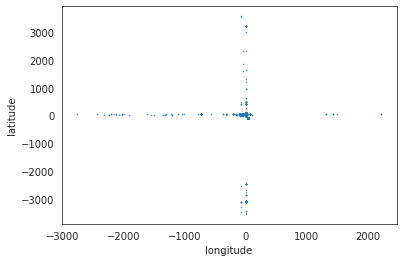

In [15]:
# Sanity Check Latitude and Longitude Values
longitude = list(trips_df.pickup_longitude) + list(trips_df.dropoff_longitude)
latitude = list(trips_df.pickup_latitude) + list(trips_df.dropoff_latitude)

trip_data = pd.DataFrame({'latitude': latitude, 'longitude': longitude})
sns.set_style("white")
ax = sns.regplot(x="longitude", y="latitude", data=trip_data, scatter=True, fit_reg=False, scatter_kws={"s": 0.3})
plt.show()

In [8]:
# We have lots of extraneous points here. Let's pare this down to a latitude/longitude range around NYC
longitude_limit = [-74.027, -73.85]
latitude_limit = [40.67, 40.85]
trips_df2 = trips_df.copy()
trips_df2 = trips_df2[(trips_df2.pickup_longitude.between(longitude_limit[0], longitude_limit[1], inclusive=False))]
trips_df2 = trips_df2[(trips_df2.dropoff_longitude.between(longitude_limit[0], longitude_limit[1], inclusive=False))]
trips_df2 = trips_df2[(trips_df2.pickup_latitude.between(latitude_limit[0], latitude_limit[1], inclusive=False))]
trips_df2 = trips_df2[(trips_df2.dropoff_latitude.between(latitude_limit[0], latitude_limit[1], inclusive=False))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


In [10]:
# trips with 0 seconds
print(trips_df2[trips_df2.trip_time_in_secs==0].shape[0])
#trips with 0 miles
print(trips_df2[trips_df2.trip_distance==0].shape[0])

8521
67594


In [9]:
trips_df2 = trips_df2[trips_df2.trip_time_in_secs>0]
trips_df2 = trips_df2[trips_df2.trip_distance>0.0]

## Removing trips with 0 miles, 0 seconds, and with more than 6 passenegers (as it is prohibited to take more than 6 persons (including children) in a all types of taxi in newyork)

In [10]:
trips_df2 = trips_df2[(trips_df2.passenger_count > 0)&(trips_df2.passenger_count < 7)]
trips_df2.passenger_count.value_counts()

1    9996918
2    1843000
5     838081
6     572427
3     571377
4     278106
Name: passenger_count, dtype: int64

In [13]:
trips_df2.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082
5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,0.7,-73.985191,40.754932,-73.990776,40.747997


In [18]:
trips_df2.shape[0]

14099909

## Fare data 

In [11]:
fare_data_df=df_fare.copy()

In [20]:
fare_data_df.shape[0]

15100468

In [ ]:
# Check for nulls
fares_df = fare_data_df.copy()
fares_df.isnull().sum()

## Merging

In [13]:
taxi_df = trips_df2.merge(fares_df, on=['medallion','hack_license','vendor_id','pickup_datetime'], how='inner')
#taxi_df = taxi_df.drop(['index_x', 'index_y'], axis=1)

In [24]:
taxi_df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60
2,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95
3,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20
4,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,0.7,-73.985191,40.754932,-73.990776,40.747997,CRD,4.5,0.5,0.5,1.10,0.0,6.60


In [23]:
taxi_df.shape[0]

14100159

In [ ]:
taxi_df.describe

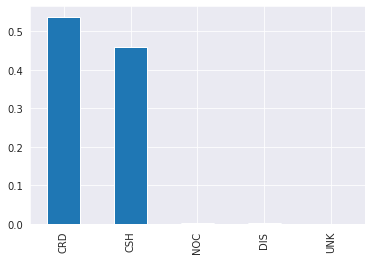

In [26]:
taxi_df.payment_type.value_counts(normalize=True).plot(kind='bar')

In [14]:
taxi_df = taxi_df[(taxi_df.payment_type == 'CRD')|(taxi_df.payment_type == 'CSH')]

## EDA

In [28]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14064068 entries, 0 to 14100158
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   medallion          object 
 1   hack_license       object 
 2   vendor_id          object 
 3   rate_code          int64  
 4   pickup_datetime    object 
 5   dropoff_datetime   object 
 6   passenger_count    int64  
 7   trip_time_in_secs  int64  
 8   trip_distance      float64
 9   pickup_longitude   float64
 10  pickup_latitude    float64
 11  dropoff_longitude  float64
 12  dropoff_latitude   float64
 13  payment_type       object 
 14  fare_amount        float64
 15  surcharge          float64
 16  mta_tax            float64
 17  tip_amount         float64
 18  tolls_amount       float64
 19  total_amount       float64
dtypes: float64(11), int64(3), object(6)
memory usage: 2.2+ GB


In [15]:
taxi_df2 = taxi_df.copy()
taxi_df2[taxi_df2.fare_amount > 400]

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
2184983,50296A056AF5D221536DC98ABB1E3274,A5E445844765D299EEFA07FF4B8F5A4C,CMT,5,2013-04-27 03:22:05,2013-04-27 03:23:21,1,76,0.4,-73.967026,40.754944,-73.9683,40.755051,CSH,450.01,0.0,0.0,0.0,0.0,450.01


Rate Code 1 = Standard City Rate

Rate Code 2 = JFK Airport Rate

Rate Code 3 = La Guardia Airport Rate

Rate Code 4 = Westchester/Nassau County Rates

Rate Code 5 = Out of City Rate with negotiated flat fare

In [16]:
# all city or the surrounding airports trips
taxi_df2 = taxi_df2[taxi_df2.rate_code < 4]
taxi_df2.shape[0]

14051304

In [17]:
#negative distances
taxi_df2[taxi_df2.trip_distance < 0].shape[0]

0

In [18]:
# speed feature
taxi_df2['speed'] = 1.0*taxi_df2.trip_distance/(taxi_df2.trip_time_in_secs/3600.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
# let's curb that maximum speed to be 200mph greater than that is meaningless
taxi_df2 = taxi_df2[taxi_df2.speed < 200.0]

In [34]:
taxi_df2.shape[0] #number of trips

15011299

In [35]:
taxi_df2.medallion.nunique() #number of cars

13401

In [36]:
taxi_df2.hack_license.nunique() #number of drivers

33091

In [37]:
taxi_df2.trip_distance.sum() #total number if miles

42851276.040000096

In [ ]:
taxi_df2['total_amount'].sum() #total amount of money

221818042.7999998

In [ ]:
!pip install basemap

In [40]:
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [41]:
pd.set_option('max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

## Distribution of number of passengers per trip

In [42]:
taxi_df2['passenger_count'].value_counts()

1    9957491
2    1837429
5     837306
6     572004
3     569897
4     277177
Name: passenger_count, dtype: int64

In [43]:
taxi_df2['passenger_count'].describe()

count    1.405130e+07
mean     1.712959e+00
std      1.390452e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

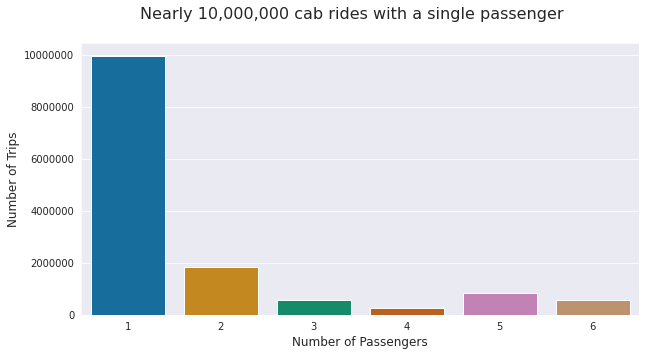

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Nearly 10,000,000 cab rides with a single passenger', fontsize=16)
ax = sns.countplot(x='passenger_count', data = taxi_df2, palette = 'colorblind', ax=ax)
ax.set_xlabel('Number of Passengers', fontsize=12)
ax.set_ylabel('Number of Trips', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

## Distribution of payment_type

In [46]:
taxi_df2['payment_type']=taxi_df2['payment_type'].astype('category')

In [45]:
taxi_df2['payment_type'].value_counts()

CRD    7572920
CSH    6478384
Name: payment_type, dtype: int64

In [47]:
payment = taxi_df2.payment_type.value_counts(normalize=True)
payment = payment.to_frame().reset_index()
payment = payment.rename(columns={'index':'Type', 'payment_type':'Frequency'})
payment

,Type,Frequency
0,CRD,0.538948
1,CSH,0.461052


In [48]:
payment = payment.replace('CRD','Credit Card')
payment = payment.replace('CSH','Cash')
#payment = payment.replace('NOC','No Charge')
#payment = payment.replace('DIS', 'Dispute')
#payment = payment.replace('UNK','Unknown')
payment.set_index('Type', inplace=True)

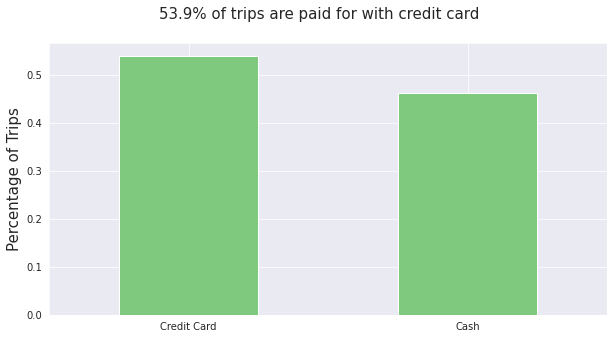

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
ax = payment.plot(kind='bar', cmap='Accent', legend=False, rot=0, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Trips', fontsize=15)
fig.suptitle('53.9% of trips are paid for with credit card', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')

## We have three types for FARE amount, TIP amount and total amount
## 1)Airport 
## 2)Non-Airport
## 3)Total(Airport+Non-Airport

## Distribution of fare amount

## All fares

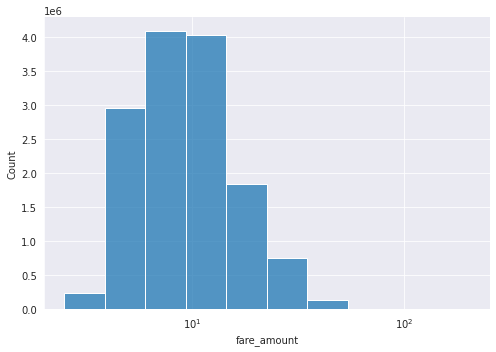

In [50]:
sns.displot(data=taxi_df2,x="fare_amount",kind="hist",aspect=1.4,log_scale=10,bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

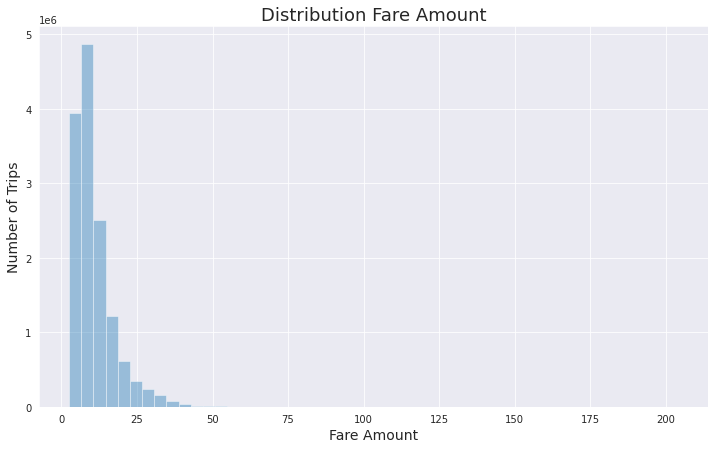

In [21]:
(fig, ax) = plt.subplots(figsize=(12,7))
ax = sns.distplot(taxi_df2.fare_amount, kde=False)
ax.set_title('Distribution Fare Amount', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution of Fare Amount')

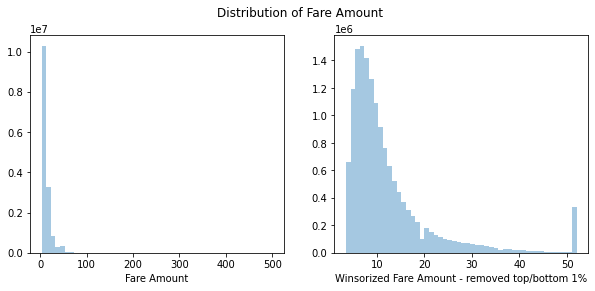

In [ ]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(taxi_df2.fare_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(taxi_df2.fare_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Fare Amount')
ax[1].set_xlabel('Winsorized Fare Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Fare Amount')

In [23]:
winsorized_fare_amt = winsorize(taxi_df2.fare_amount, limits=[0.01, 0.01])
fare_amt_median = np.median(winsorized_fare_amt)

fare_amt_lower = stats.scoreatpercentile(winsorized_fare_amt, 5)
fare_amt_upper = stats.scoreatpercentile(winsorized_fare_amt, 95)

print(fare_amt_lower, fare_amt_median, fare_amt_upper)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


4.5 9.0 24.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

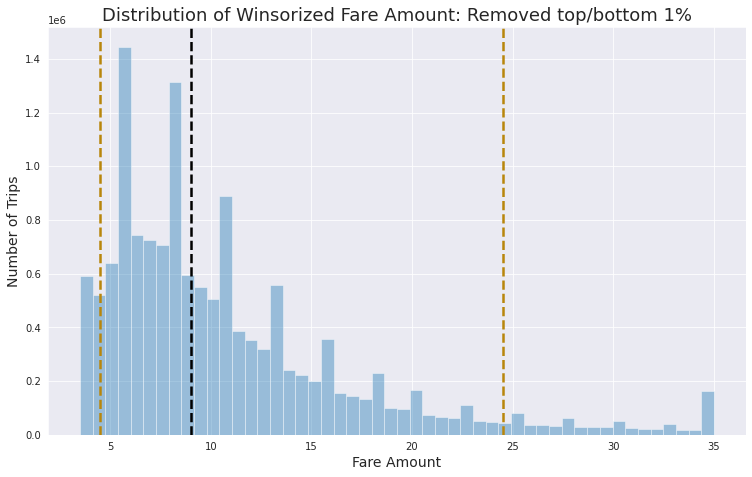

In [24]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_fare_amt, kde=False)
ax.axvline(fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Fare Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

## Airport Fares

In [25]:
airport_fare = taxi_df2.copy()
airport_fare = airport_fare[airport_fare.rate_code!=1]
airport_fare.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
1257,8FFD1464685AAE39ECD77415EE4E11A1,2E26C830AF4E9FB0B4CDFFE3ADA896B6,VTS,2,2013-04-13 00:25:00,2013-04-13 00:32:00,1,420,1.60,-73.962776,...,-73.983147,40.767006,CSH,52.0,0.0,0.5,0.0,0.00,52.50,13.714286
2709,AB202E7B90279C7EE9BF678AE97052F3,A9E6AEC63C66CA124E46F31CFC8757C8,VTS,2,2013-04-12 17:39:00,2013-04-12 18:18:00,1,2340,3.16,-73.984055,...,-73.985054,40.756271,CSH,52.0,0.0,0.5,0.0,0.00,52.50,4.861538
6459,8FFD1464685AAE39ECD77415EE4E11A1,2E26C830AF4E9FB0B4CDFFE3ADA896B6,VTS,2,2013-04-12 19:27:00,2013-04-12 19:38:00,1,660,3.59,-73.928154,...,-73.955849,40.803982,CRD,52.0,0.0,0.5,6.0,5.33,63.83,19.581818
7291,B5B3277A071E6FABA59080A3B4F9E675,E07A9B039B14B87F86FB7B931CFA4716,VTS,2,2013-04-12 18:44:00,2013-04-12 18:55:00,1,660,5.23,-73.975616,...,-74.009125,40.709240,CRD,52.0,0.0,0.5,0.0,5.33,57.83,28.527273
8061,0CC4D181FF050AE7238AAA956DF1096D,4D462DA2279D8F6A8C812A0C9B0416D4,VTS,2,2013-04-12 19:14:00,2013-04-12 19:29:00,1,900,3.67,-73.930389,...,-73.981667,40.744862,CSH,52.0,0.0,0.5,0.0,5.33,57.83,14.680000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


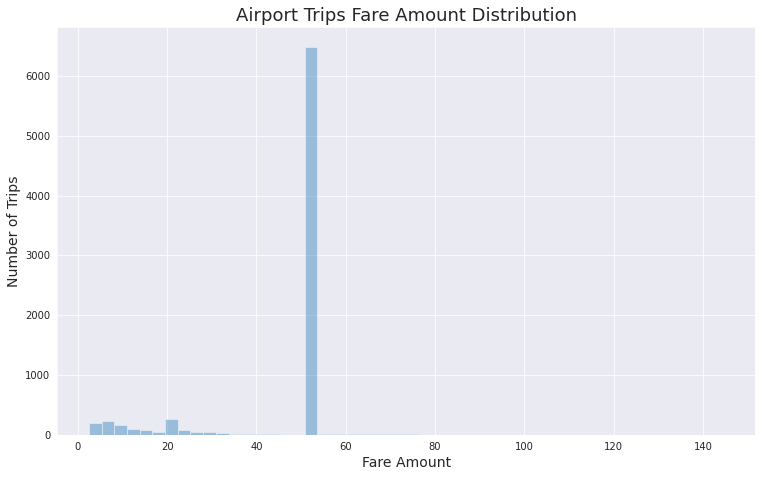

In [26]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_fare.fare_amount, kde=False)
ax.set_title('Airport Trips Fare Amount Distribution', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)
None

In [27]:
winsorized_airport_fare_amt = winsorize(airport_fare.fare_amount, limits=[0.01, 0.01])
airport_fare_amt_median = np.median(winsorized_airport_fare_amt)

airport_fare_amt_lower = stats.scoreatpercentile(winsorized_airport_fare_amt, 5)
airport_fare_amt_upper = stats.scoreatpercentile(winsorized_airport_fare_amt, 95)

print(airport_fare_amt_lower, airport_fare_amt_median, airport_fare_amt_upper)

8.0 52.0 52.0


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

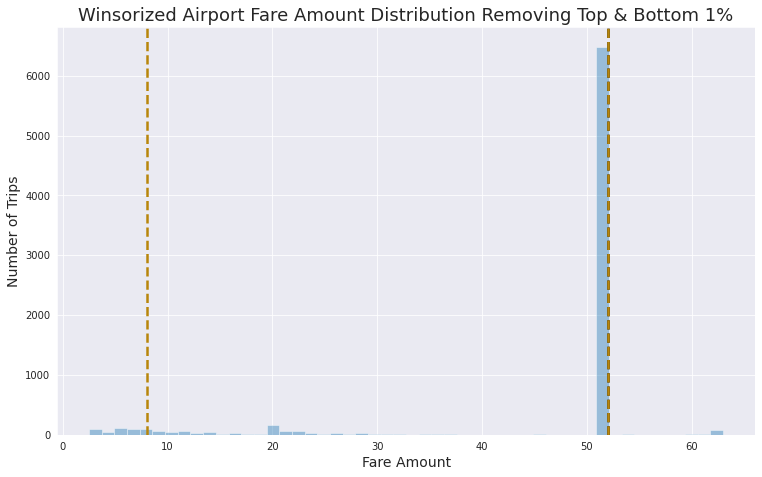

In [28]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_airport_fare_amt, kde=False)
ax.axvline(airport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Winsorized Airport Fare Amount Distribution Removing Top & Bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

## Non-Airport Fares

In [29]:
nonairport_fare = taxi_df2.copy()
nonairport_fare = nonairport_fare[nonairport_fare.rate_code == 1]
nonairport_fare.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,...,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00,11.857708
1,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,...,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60,9.833080
2,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,...,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95,8.560701
3,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,...,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20,12.743363
4,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,0.7,-73.985191,...,-73.990776,40.747997,CRD,4.5,0.5,0.5,1.10,0.0,6.60,13.333333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

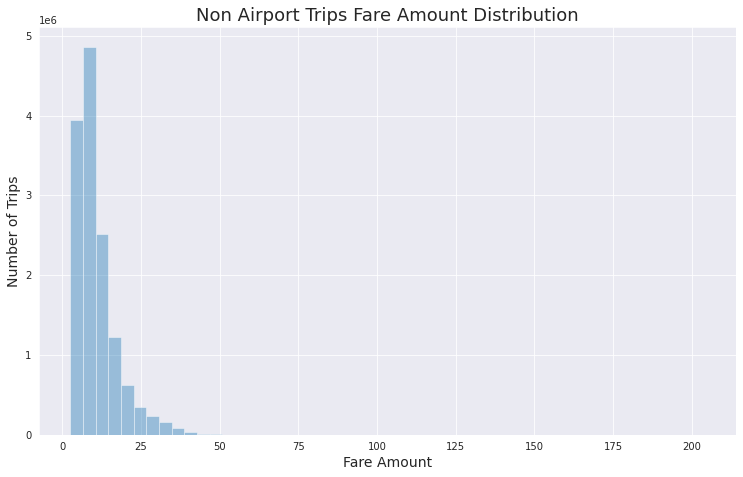

In [30]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_fare.fare_amount, kde=False)
ax.set_title('Non Airport Trips Fare Amount Distribution', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

In [31]:
winsorized_nonairport_fare_amt = winsorize(nonairport_fare.fare_amount, limits=[0.01, 0.01])
nonairport_fare_amt_median = np.median(winsorized_nonairport_fare_amt)

nonairport_fare_amt_lower = stats.scoreatpercentile(winsorized_nonairport_fare_amt, 5)
nonairport_fare_amt_upper = stats.scoreatpercentile(winsorized_nonairport_fare_amt, 95)

print(nonairport_fare_amt_lower, nonairport_fare_amt_median, nonairport_fare_amt_upper)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


4.5 9.0 24.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

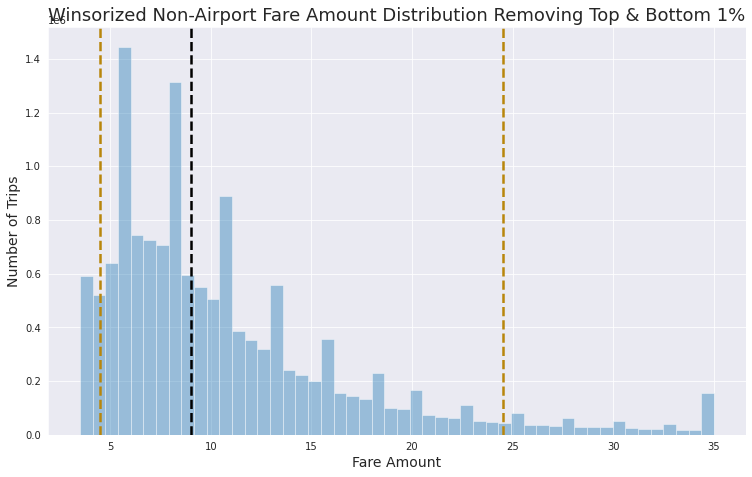

In [32]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_nonairport_fare_amt, kde=False)
ax.axvline(fare_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Winsorized Non-Airport Fare Amount Distribution Removing Top & Bottom 1%', fontsize=18)
ax.set_xlabel('Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution of Fare Amount: Airport vs Non-Airport Fares')

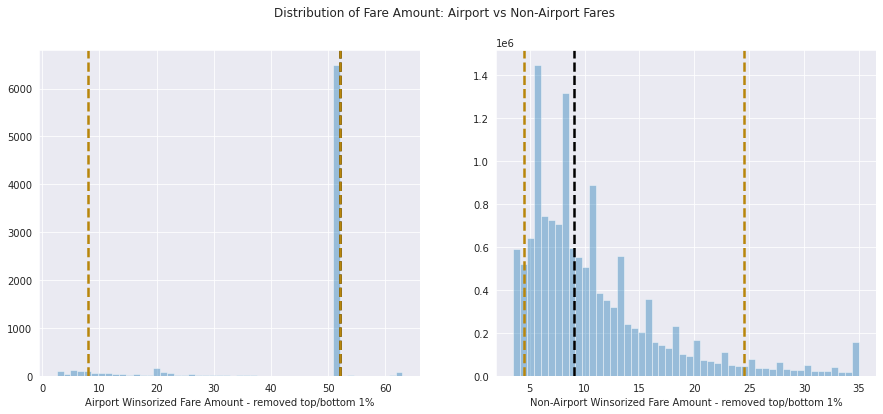

In [33]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(winsorized_airport_fare_amt, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[0].axvline(airport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax[0].axvline(airport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].axvline(airport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1] = sns.distplot(winsorized_nonairport_fare_amt, ax=ax[1], kde=False)
ax[1].axvline(nonairport_fare_amt_median, lw=2.5, ls='dashed', color='black')
ax[1].axvline(nonairport_fare_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1].axvline(nonairport_fare_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].set_xlabel('Airport Winsorized Fare Amount - removed top/bottom 1%')
ax[1].set_xlabel('Non-Airport Winsorized Fare Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Fare Amount: Airport vs Non-Airport Fares')

In [35]:
print(airport_fare.fare_amount.mode())
print(airport_fare.fare_amount.median())

0    52.0
dtype: float64
52.0


In [36]:
most_common_airport_fare = airport_fare.copy()
most_common_airport_fare = most_common_airport_fare[most_common_airport_fare.fare_amount == 52.0]
most_common_airport_fare.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
1257,8FFD1464685AAE39ECD77415EE4E11A1,2E26C830AF4E9FB0B4CDFFE3ADA896B6,VTS,2,2013-04-13 00:25:00,2013-04-13 00:32:00,1,420,1.60,-73.962776,...,-73.983147,40.767006,CSH,52.0,0.0,0.5,0.0,0.00,52.50,13.714286
2709,AB202E7B90279C7EE9BF678AE97052F3,A9E6AEC63C66CA124E46F31CFC8757C8,VTS,2,2013-04-12 17:39:00,2013-04-12 18:18:00,1,2340,3.16,-73.984055,...,-73.985054,40.756271,CSH,52.0,0.0,0.5,0.0,0.00,52.50,4.861538
6459,8FFD1464685AAE39ECD77415EE4E11A1,2E26C830AF4E9FB0B4CDFFE3ADA896B6,VTS,2,2013-04-12 19:27:00,2013-04-12 19:38:00,1,660,3.59,-73.928154,...,-73.955849,40.803982,CRD,52.0,0.0,0.5,6.0,5.33,63.83,19.581818
7291,B5B3277A071E6FABA59080A3B4F9E675,E07A9B039B14B87F86FB7B931CFA4716,VTS,2,2013-04-12 18:44:00,2013-04-12 18:55:00,1,660,5.23,-73.975616,...,-74.009125,40.709240,CRD,52.0,0.0,0.5,0.0,5.33,57.83,28.527273
8061,0CC4D181FF050AE7238AAA956DF1096D,4D462DA2279D8F6A8C812A0C9B0416D4,VTS,2,2013-04-12 19:14:00,2013-04-12 19:29:00,1,900,3.67,-73.930389,...,-73.981667,40.744862,CSH,52.0,0.0,0.5,0.0,5.33,57.83,14.680000


In [37]:
# How did most passengers choose to pay this?
most_common_airport_fare.payment_type.value_counts(normalize=True)

CRD    0.563146
CSH    0.436854
Name: payment_type, dtype: float64

## Distribution of tip amount

## All Tips

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution of Tip Amount')

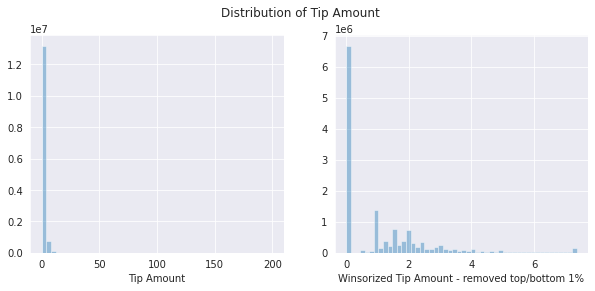

In [38]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(taxi_df2.tip_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(taxi_df2.tip_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Tip Amount')

In [39]:
winsorized_tip_amt = winsorize(taxi_df2.tip_amount, limits=[0.01, 0.01])
tip_amt_median = np.median(winsorized_tip_amt)

tip_amt_lower = stats.scoreatpercentile(winsorized_tip_amt, 5)
tip_amt_upper = stats.scoreatpercentile(winsorized_tip_amt, 95)

print(tip_amt_lower, tip_amt_median, tip_amt_upper)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.0 1.0 4.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

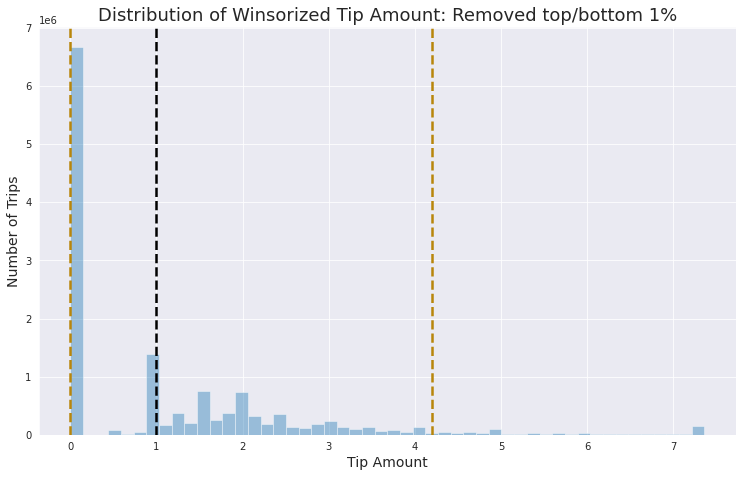

In [40]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_tip_amt, kde=False)
ax.axvline(tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

## Airport Tips

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Airport Fares: Distribution of Tip Amount')

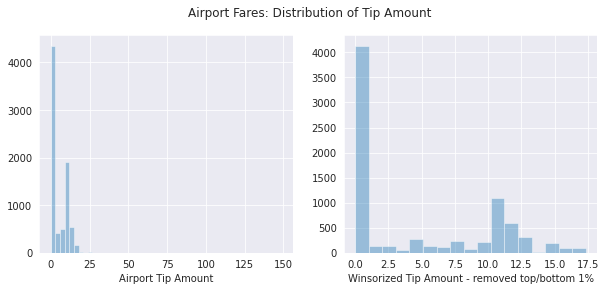

In [41]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(airport_fare.tip_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(airport_fare.tip_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Airport Fares: Distribution of Tip Amount')

In [42]:
airport_winsorized_tip_amt = winsorize(airport_fare.tip_amount, limits=[0.01, 0.01])
airport_tip_amt_median = np.median(airport_winsorized_tip_amt)

airport_tip_amt_lower = stats.scoreatpercentile(airport_winsorized_tip_amt, 5)
airport_tip_amt_upper = stats.scoreatpercentile(airport_winsorized_tip_amt, 95)

print(airport_tip_amt_lower, airport_tip_amt_median, airport_tip_amt_upper)

0.0 0.0 14.143999999999869


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

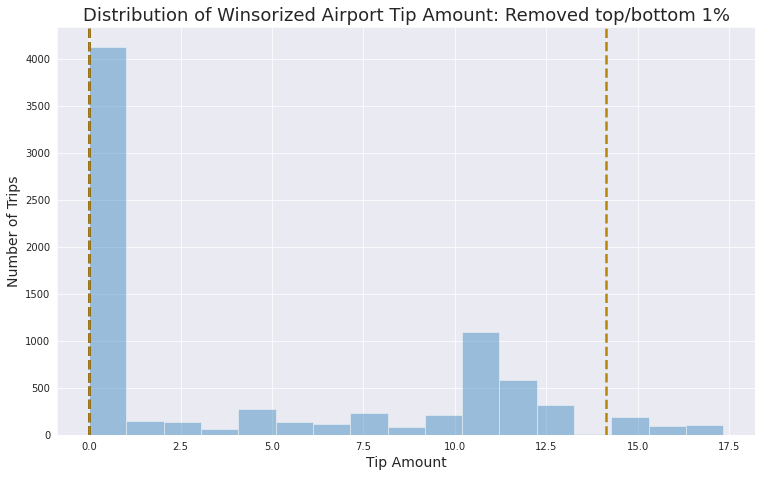

In [43]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_winsorized_tip_amt, kde=False)
ax.axvline(airport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Airport Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

## Non-Airport Tips

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Non-Airport Fares: Distribution of Tip Amount')

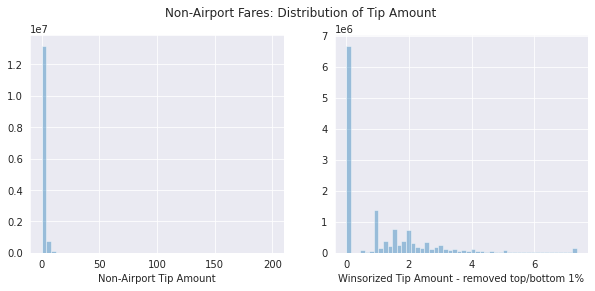

In [44]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(nonairport_fare.tip_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(nonairport_fare.tip_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Non-Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Non-Airport Fares: Distribution of Tip Amount')

In [45]:
nonairport_winsorized_tip_amt = winsorize(nonairport_fare.tip_amount, limits=[0.01, 0.01])
nonairport_tip_amt_median = np.median(nonairport_winsorized_tip_amt)

nonairport_tip_amt_lower = stats.scoreatpercentile(nonairport_winsorized_tip_amt, 5)
nonairport_tip_amt_upper = stats.scoreatpercentile(nonairport_winsorized_tip_amt, 95)

print(nonairport_tip_amt_lower, nonairport_tip_amt_median, nonairport_tip_amt_upper)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


0.0 1.0 4.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

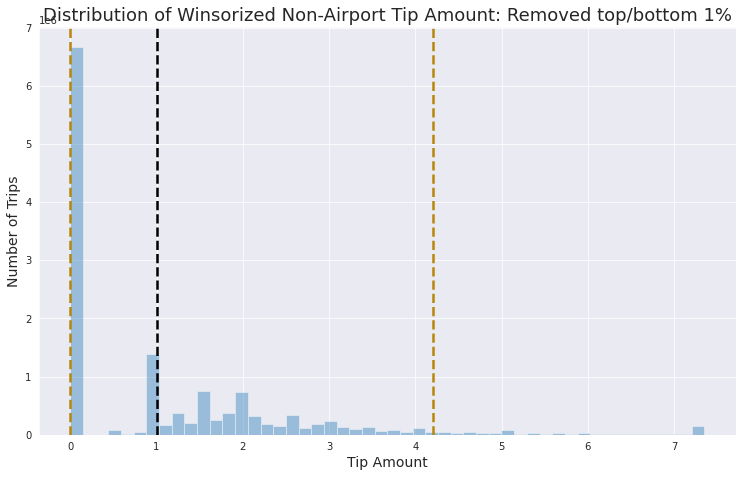

In [46]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_winsorized_tip_amt, kde=False)
ax.axvline(nonairport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(nonairport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(nonairport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Non-Airport Tip Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Tip Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution of Tip Amount: Airport vs Non-Airport Fares')

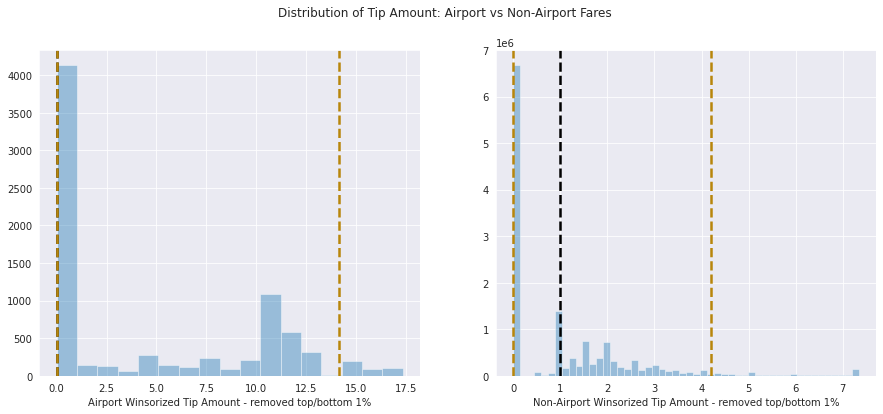

In [47]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(airport_winsorized_tip_amt, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[0].axvline(airport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax[0].axvline(airport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].axvline(airport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1] = sns.distplot(nonairport_winsorized_tip_amt, ax=ax[1], kde=False)
ax[1].axvline(nonairport_tip_amt_median, lw=2.5, ls='dashed', color='black')
ax[1].axvline(nonairport_tip_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1].axvline(nonairport_tip_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].set_xlabel('Airport Winsorized Tip Amount - removed top/bottom 1%')
ax[1].set_xlabel('Non-Airport Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Tip Amount: Airport vs Non-Airport Fares')

## Distribution of Total amount

## All Total amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution of Total Amount')

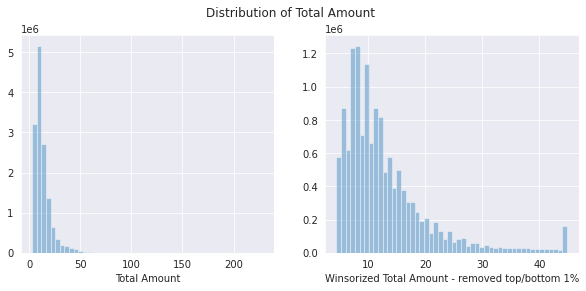

In [48]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(taxi_df2.total_amount, kde=False, ax=ax[0])
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(taxi_df2.total_amount, limits=[0.01, 0.01]), kde=False, ax=ax[1])
ax[0].set_xlabel('Total Amount')
ax[1].set_xlabel('Winsorized Total Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Total Amount')

In [49]:
winsorized_tot_amt = winsorize(taxi_df2.total_amount, limits=[0.01, 0.01])
tot_amt_median = np.median(winsorized_tot_amt)

tot_amt_lower = stats.scoreatpercentile(winsorized_tot_amt, 5)
tot_amt_upper = stats.scoreatpercentile(winsorized_tot_amt, 95)

print(tot_amt_lower, tot_amt_median, tot_amt_upper)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


5.5 10.8 29.25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

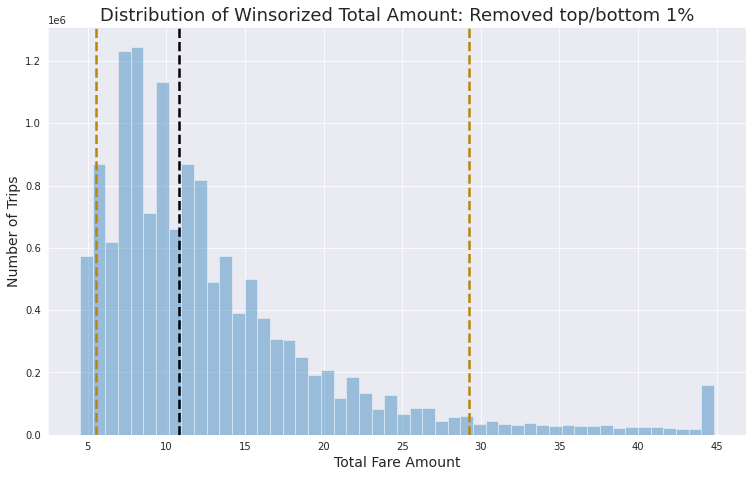

In [50]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(winsorized_tot_amt, kde=False)
ax.axvline(tot_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Distribution of Winsorized Total Amount: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Total Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

## Airport Total amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Airport Fares: Distribution of Tip Amount')

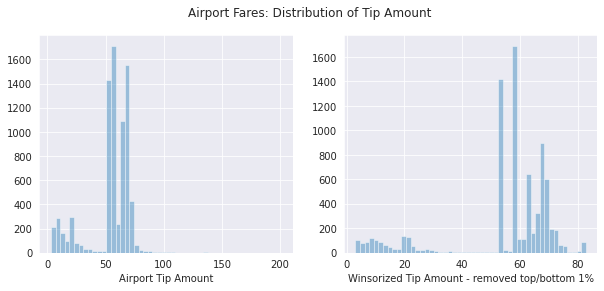

In [51]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(airport_fare.total_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(airport_fare.total_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Airport Tip Amount')
ax[1].set_xlabel('Winsorized Tip Amount - removed top/bottom 1%')
fig.suptitle('Airport Fares: Distribution of Tip Amount')

In [52]:
airport_winsorized_tot_amt = winsorize(airport_fare.total_amount, limits=[0.01, 0.01])
airport_tot_amt_median = np.median(airport_winsorized_tot_amt)

airport_tot_amt_lower = stats.scoreatpercentile(airport_winsorized_tot_amt, 5)
airport_tot_amt_upper = stats.scoreatpercentile(airport_winsorized_tot_amt, 95)

print(airport_tot_amt_lower, airport_tot_amt_median, airport_tot_amt_upper)

9.5 57.83 72.28


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

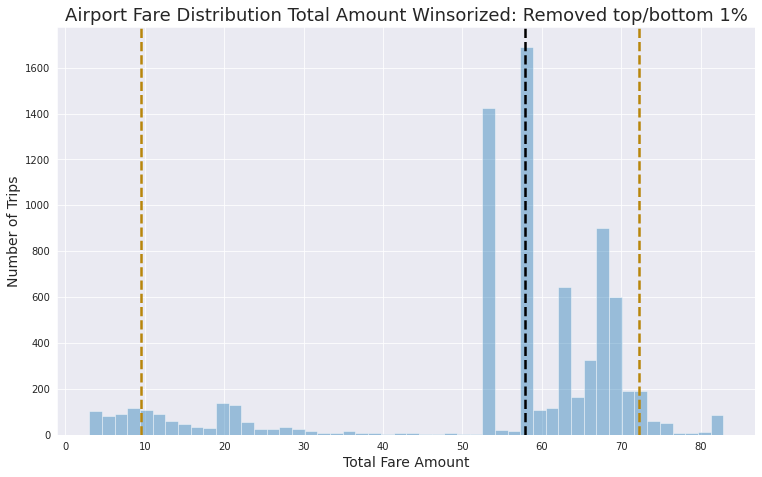

In [53]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(airport_winsorized_tot_amt, kde=False)
ax.axvline(airport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(airport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(airport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Airport Fare Distribution Total Amount Winsorized: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Total Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

In [54]:
airport_fare.total_amount.mode()

0    57.83
dtype: float64

## Non_Airport Total amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Non-Airport Fares: Distribution of Total Amount')

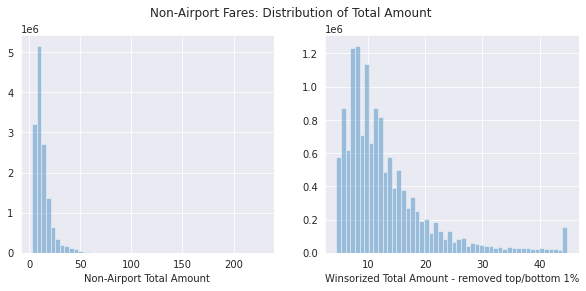

In [55]:
(fig, ax) = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(nonairport_fare.total_amount, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[1] = sns.distplot(winsorize(nonairport_fare.total_amount, limits=[0.01, 0.01]), ax=ax[1], kde=False)
ax[0].set_xlabel('Non-Airport Total Amount')
ax[1].set_xlabel('Winsorized Total Amount - removed top/bottom 1%')
fig.suptitle('Non-Airport Fares: Distribution of Total Amount')

In [56]:
nonairport_winsorized_tot_amt = winsorize(nonairport_fare.total_amount, limits=[0.01, 0.01])
nonairport_tot_amt_median = np.median(nonairport_winsorized_tot_amt)

nonairport_tot_amt_lower = stats.scoreatpercentile(nonairport_winsorized_tot_amt, 5)
nonairport_tot_amt_upper = stats.scoreatpercentile(nonairport_winsorized_tot_amt, 95)

print(nonairport_tot_amt_lower, nonairport_tot_amt_median, nonairport_tot_amt_upper)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


5.5 10.8 29.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Trips')

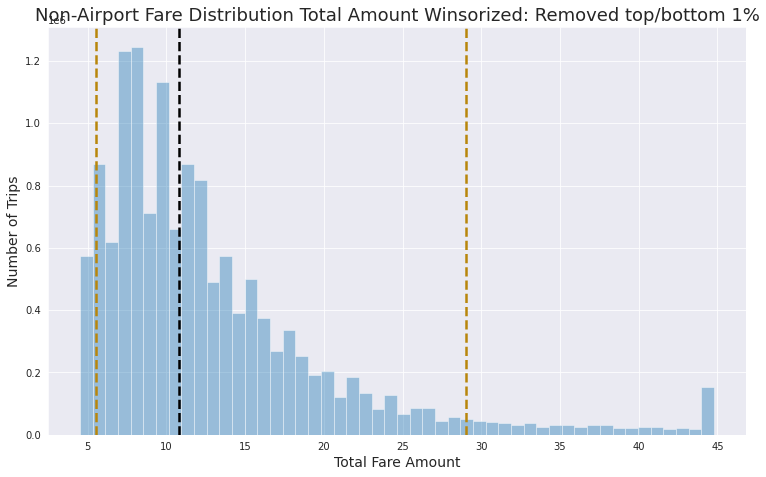

In [57]:
(fig, ax) = plt.subplots(figsize=(12.5,7.5))
ax = sns.distplot(nonairport_winsorized_tot_amt, kde=False)
ax.axvline(nonairport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax.axvline(nonairport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.axvline(nonairport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax.set_title('Non-Airport Fare Distribution Total Amount Winsorized: Removed top/bottom 1%', fontsize=18)
ax.set_xlabel('Total Fare Amount', fontsize=14)
ax.set_ylabel('Number of Trips', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Distribution of Total Amount: Airport vs Non-Airport Fares')

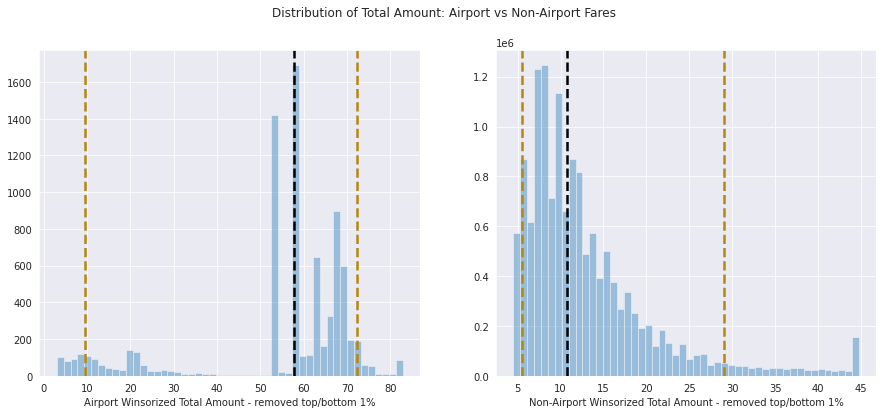

In [58]:
(fig, ax) = plt.subplots(1,2, figsize=(15,6))
ax[0] = sns.distplot(airport_winsorized_tot_amt, ax=ax[0], kde=False)
# Remove top and bottom 1% of fare amounts
ax[0].axvline(airport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax[0].axvline(airport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].axvline(airport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1] = sns.distplot(nonairport_winsorized_tot_amt, ax=ax[1], kde=False)
ax[1].axvline(nonairport_tot_amt_median, lw=2.5, ls='dashed', color='black')
ax[1].axvline(nonairport_tot_amt_lower, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[1].axvline(nonairport_tot_amt_upper, lw=2.5, color='darkgoldenrod', ls='dashed')
ax[0].set_xlabel('Airport Winsorized Total Amount - removed top/bottom 1%')
ax[1].set_xlabel('Non-Airport Winsorized Total Amount - removed top/bottom 1%')
fig.suptitle('Distribution of Total Amount: Airport vs Non-Airport Fares')

## Top 5 busiest hours of the day

## We can solve this problem using two methods 
## 1) Trips count
## 2) Passenger count

## Trips count

In [20]:
taxi_df2['pickup_datetime'] = pd.to_datetime(taxi_df2['pickup_datetime'])
taxi_df2['dropoff_datetime'] = pd.to_datetime(taxi_df2['dropoff_datetime'])

In [ ]:
print('Starting date for pickup',taxi_df2.pickup_datetime.min())
print('Ending date for pickcup',taxi_df2.pickup_datetime.max())

Starting date for pickup 2013-04-01 00:00:00
Ending date for pickcup 2013-04-30 23:59:58


In [ ]:
print('Starting date for dropoff',taxi_df2.dropoff_datetime.min())
print('Ending date for dropoff',taxi_df2.dropoff_datetime.max())

Starting date for dropoff 2013-04-01 00:00:00
Ending date for dropoff 2013-05-01 02:19:25


In [ ]:
taxi_df2['Date'] = pd.to_datetime(taxi_df2['pickup_datetime']).dt.date
taxi_df2['Date'] = pd.to_datetime(taxi_df2['Date'])

In [ ]:
dates_list = pd.date_range(start='04/1/2013', end='04/30/2013')
hours_list=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
final=[]
for i in dates_list:
  datetime=[]
  datetime.append(i)
  date_df = taxi_df2[taxi_df2.Date==i]
  for j in hours_list:
             datetime.append(len(date_df[date_df.pickup_datetime.dt.hour==j]))
  final.append(datetime)


print(final)

[[Timestamp('2013-04-01 00:00:00', freq='D'), 9087, 5280, 3377, 2309, 2667, 4489, 11080, 19017, 23611, 23859, 20569, 20069, 20851, 20752, 21736, 22214, 21739, 25907, 28795, 28183, 27550, 26672, 23057, 16127], [Timestamp('2013-04-02 00:00:00', freq='D'), 11157, 6281, 3717, 2470, 2558, 4321, 11905, 22513, 27530, 27400, 23889, 23592, 24643, 23951, 25874, 25298, 21321, 26388, 33436, 33920, 33126, 31328, 27626, 21305], [Timestamp('2013-04-03 00:00:00', freq='D'), 13772, 7799, 4768, 3106, 2855, 4279, 12402, 24473, 28862, 28038, 24656, 24719, 25457, 24603, 25989, 24919, 19847, 24423, 31639, 34328, 33901, 33169, 31414, 24446], [Timestamp('2013-04-04 00:00:00', freq='D'), 15713, 8996, 5502, 3515, 3272, 4490, 12854, 24936, 29395, 28080, 25184, 24772, 25799, 25133, 26423, 25079, 20175, 25729, 32816, 34612, 34575, 33849, 32857, 28834], [Timestamp('2013-04-05 00:00:00', freq='D'), 21712, 14025, 9163, 6234, 4793, 4954, 12457, 23395, 29155, 27881, 24597, 24358, 25120, 23599, 26003, 23923, 19446, 2451

In [ ]:
dates_df=pd.DataFrame(final,columns=['Date',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
dates_df

,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2013-04-01,9087,5280,3377,2309,2667,4489,11080,19017,23611,...,21736,22214,21739,25907,28795,28183,27550,26672,23057,16127
1,2013-04-02,11157,6281,3717,2470,2558,4321,11905,22513,27530,...,25874,25298,21321,26388,33436,33920,33126,31328,27626,21305
2,2013-04-03,13772,7799,4768,3106,2855,4279,12402,24473,28862,...,25989,24919,19847,24423,31639,34328,33901,33169,31414,24446
3,2013-04-04,15713,8996,5502,3515,3272,4490,12854,24936,29395,...,26423,25079,20175,25729,32816,34612,34575,33849,32857,28834
4,2013-04-05,21712,14025,9163,6234,4793,4954,12457,23395,29155,...,26003,23923,19446,24516,32048,35655,35525,34607,35749,35521
5,2013-04-06,32259,28159,22626,16657,10628,4874,5862,10012,13762,...,25187,23537,18687,21886,27995,27931,28603,29571,32064,32927
6,2013-04-07,30594,28312,25387,20348,12654,5474,4859,6202,9307,...,25347,23598,19058,20990,24862,22751,20244,17995,17729,15772
7,2013-04-08,10112,5779,3649,2558,2764,4597,12389,22459,25902,...,22552,22855,19957,24325,29628,29944,28508,25221,22338,18081
8,2013-04-09,12947,6578,4004,2578,2564,4217,12178,23972,27777,...,24166,23435,19133,24805,31494,31703,30623,29729,27871,21849
9,2013-04-10,14483,8507,5224,3469,3122,4335,12357,23865,28511,...,24724,23675,19182,25213,32794,37090,31883,30031,31736,23707


In [ ]:
means_list=list(dates_df.mean(axis=0))
hourly_values=pd.DataFrame(zip(hours_list,means_list),columns=['Hour','Mean'])
hourly_values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,Hour,Mean
0,0,19034.066667
1,1,13765.033333
2,2,10311.133333
3,3,7455.166667
4,4,5446.833333
5,5,4786.566667
6,6,10654.300000
7,7,19387.466667
8,8,23689.566667
9,9,24188.000000


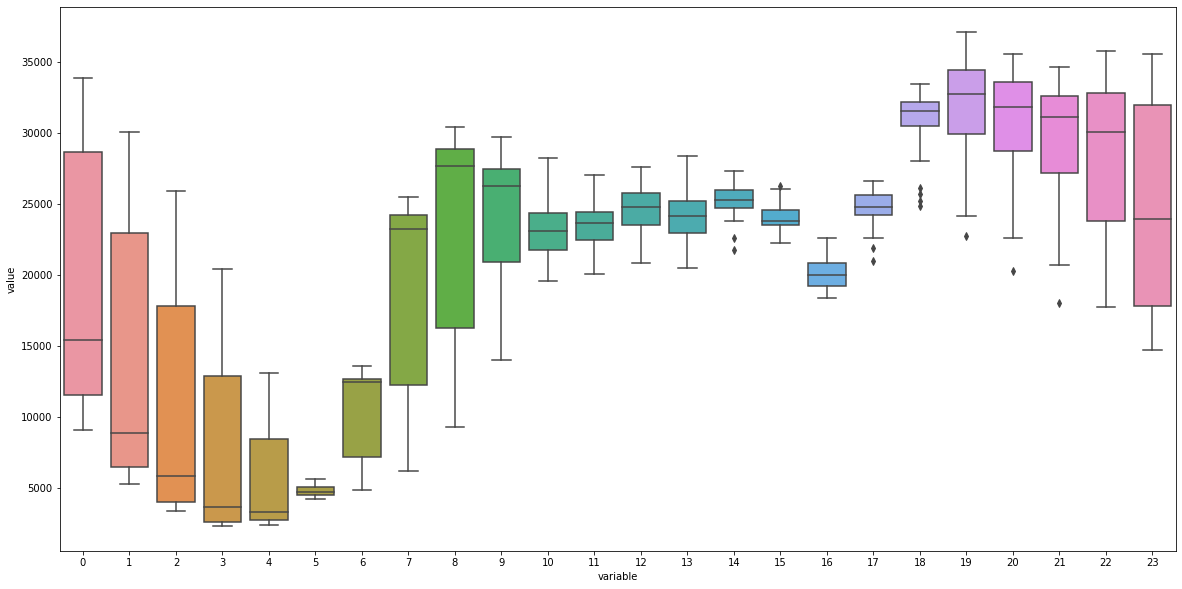

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.boxplot(x="variable", y="value", data=pd.melt(dates_df.iloc[:,1:]))
plt.show()

## We can clearly say that 6pm to 10pm are Top 5 busiest hours in a day from average values and graph 

## 2) Passenger count

In [60]:
taxi_df2.groupby(taxi_df2.pickup_datetime.dt.hour)['passenger_count'].sum().sort_values(ascending=False)

pickup_datetime
19    1545408
18    1489120
20    1484270
21    1431273
22    1387915
23    1204093
14    1201952
12    1187628
17    1182647
15    1152979
13    1147418
9     1145355
11    1133410
8     1110772
10    1102852
16     955987
0      914805
7      883813
1      657701
2      493860
6      453399
3      355677
4      247646
5      192495
Name: passenger_count, dtype: int64

In [61]:
pc = taxi_df2.groupby(taxi_df2.pickup_datetime.dt.hour)['passenger_count'].size().sort_values(ascending=False).head()
pc = pc.to_frame().reset_index()
pc = pc.rename(columns={'pickup_datetime': 'hour'})
pc_df = pc.copy()
pc_df


,hour,passenger_count
0,19,897799
1,18,868202
2,20,858910
3,21,822142
4,22,790904


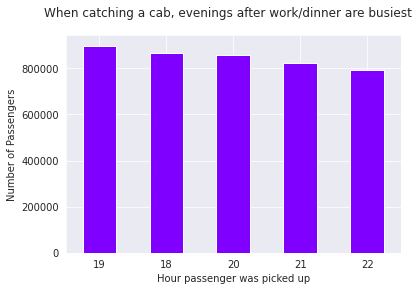

In [62]:
fig, ax = plt.subplots(figsize=(6,4))
ax = pc_df.set_index('hour').plot(kind='bar', colormap='rainbow', legend=False, rot=0, ax=ax)
ax.set_xlabel('Hour passenger was picked up')
ax.set_ylabel('Number of Passengers')
fig.suptitle('When catching a cab, evenings after work/dinner are busiest')
plt.ticklabel_format(style='plain', axis='y')

In [64]:
taxi_df2['DayofWeek'] = taxi_df2.pickup_datetime.dt.day_name()
taxi_df2['Hour'] = taxi_df2.pickup_datetime.dt.hour
taxi_df2.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed,DayofWeek,Hour
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,...,CRD,11.0,1.0,0.5,2.50,0.0,15.00,11.857708,Thursday,18
1,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,...,CRD,16.5,1.0,0.5,3.60,0.0,21.60,9.833080,Thursday,17
2,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,...,CRD,10.0,1.0,0.5,3.45,0.0,14.95,8.560701,Thursday,18
3,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,...,CRD,15.0,0.5,0.5,3.20,0.0,19.20,12.743363,Thursday,20
4,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,0.7,-73.985191,...,CRD,4.5,0.5,0.5,1.10,0.0,6.60,13.333333,Friday,2


Text(0.5, 1.0, 'Passengers traveling by taxi in April 2013')

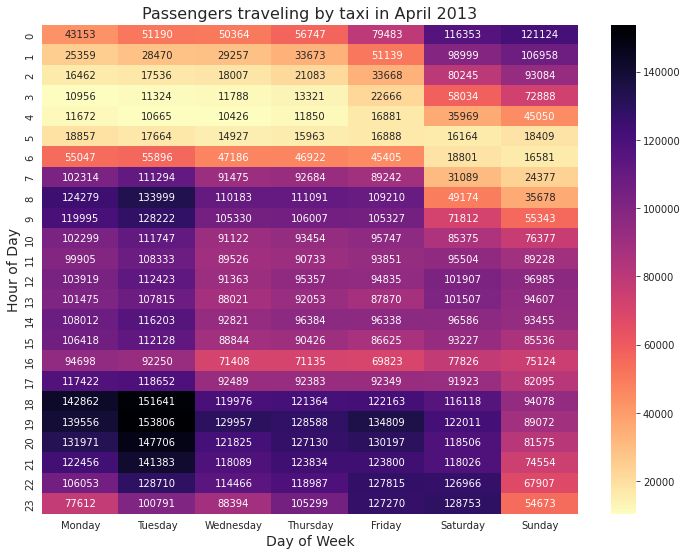

In [65]:
# What are the busiest days and hours for taxi drivers?
busiest_df = taxi_df2.groupby(['DayofWeek','Hour'])['passenger_count'].size().reset_index()
busiest_piv = pd.pivot_table(busiest_df, values="passenger_count",index=["Hour"], columns=["DayofWeek"], fill_value=0)
busiest_piv = busiest_piv[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
#plot pivot table as heatmap using seaborn
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(busiest_piv, ax=ax, cmap='magma_r', annot=True, fmt="d")
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Hour of Day', fontsize=14)
ax.set_title('Passengers traveling by taxi in April 2013', fontsize=16)

## Top 10 Busiest Locations of the city

In [21]:
taxi_df2_loc=taxi_df2.copy()
taxi_df2_loc['pickup_latitude'] = taxi_df2_loc.pickup_latitude.round(2)
taxi_df2_loc['pickup_longitude'] = taxi_df2_loc.pickup_longitude.round(2)
taxi_df2_loc['dropoff_latitude'] = taxi_df2_loc.dropoff_latitude.round(2)
taxi_df2_loc['dropoff_longitude'] = taxi_df2_loc.dropoff_longitude.round(2)
taxi_df2_loc.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,speed
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.96,...,-73.98,40.79,CRD,11.0,1.0,0.5,2.50,0.0,15.00,11.857708
1,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.98,...,-74.01,40.72,CRD,16.5,1.0,0.5,3.60,0.0,21.60,9.833080
2,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.98,...,-73.96,40.78,CRD,10.0,1.0,0.5,3.45,0.0,14.95,8.560701
3,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.01,...,-73.96,40.76,CRD,15.0,0.5,0.5,3.20,0.0,19.20,12.743363
4,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,1,2013-04-05 02:48:11,2013-04-05 02:51:21,2,189,0.7,-73.99,...,-73.99,40.75,CRD,4.5,0.5,0.5,1.10,0.0,6.60,13.333333


In [22]:
taxi_df2_loc['pickup_geocode'] = taxi_df2_loc.pickup_latitude.astype(str) + ', ' + taxi_df2_loc.pickup_longitude.astype(str)
taxi_df2_loc['dropoff_geocode'] =taxi_df2_loc.dropoff_latitude.astype(str) + ', ' + taxi_df2_loc.dropoff_longitude.astype(str)

## Pickup

In [23]:
pickup = taxi_df2_loc.groupby('pickup_geocode')['pickup_geocode'].count().sort_values(ascending=False).head(10)
pickup = pickup.to_frame().rename(columns={'pickup_geocode':'Number of Trips'}).reset_index()
pickup_df = pickup.copy()
pickup_df = pickup_df.rename(columns={'pickup_geocode':'Pickup_Geocode'})
pickup_df['location'] = pickup_df.Pickup_Geocode.apply(geolocator.reverse)
pickup_df['address'] = [i.address for i in pickup_df.location]
pickup_df['address'] = pickup_df['address'].astype(str)
pickup_df['zipcode'] = pickup_df['address'].str.extract('(\d{5})', expand=True).astype(int)
pickup_df.drop('location',axis=1,inplace=True)
pickup_df

,Pickup_Geocode,Number of Trips,address,zipcode
0,"40.76, -73.97",898573,"664, Lexington Avenue, Manhattan Community Boa...",10022
1,"40.75, -73.99",798550,"137, West 33rd Street, Manhattan Community Boa...",10001
2,"40.76, -73.98",736811,"Rockefeller Center, 45, Rockefeller Plaza, Mid...",10111
3,"40.75, -73.98",726032,"35, East 38th Street, Murray Hill, Manhattan, ...",10016
4,"40.74, -73.99",671289,"10, East 21st Street, Manhattan Community Boar...",10010
5,"40.76, -73.99",627462,"341, West 45th Street, Manhattan Community Boa...",10036
6,"40.73, -73.99",521466,"51 Astor Place, East 9th Street, East Village,...",10003
7,"40.77, -73.96",508967,"Dallas BBQ, 1265, 3rd Avenue, Manhattan Commun...",10021
8,"40.77, -73.98",467760,"Central Park Outer Loop, Manhattan, New York C...",10023
9,"40.73, -74.0",454671,"Filomen D'agostino Residence Hall, 110, West 3...",10012


In [24]:
pickup_df['Number of Trips'].sum()

6411581

## Dropoff

In [25]:
dropoff = taxi_df2_loc.groupby('dropoff_geocode')['dropoff_geocode'].count().sort_values(ascending=False).head(10)
dropoff = dropoff.to_frame().rename(columns={'dropoff_geocode':'Number of Trips'}).reset_index()
dropoff_df = dropoff.copy()
dropoff_df = dropoff_df.rename(columns={'dropoff_geocode':'Dropoff_Geocode'})
dropoff_df['location'] = dropoff_df.Dropoff_Geocode.apply(geolocator.reverse)
dropoff_df['address'] = [i.address for i in dropoff_df.location]
dropoff_df['address'] = dropoff_df['address'].astype(str)
dropoff_df['zipcode'] = dropoff_df['address'].str.extract('(\d{5})', expand=True).astype(int)
dropoff_df.drop('location',axis=1,inplace=True)
dropoff_df

,Dropoff_Geocode,Number of Trips,address,zipcode
0,"40.76, -73.97",824831,"664, Lexington Avenue, Manhattan Community Boa...",10022
1,"40.76, -73.98",804504,"Rockefeller Center, 45, Rockefeller Plaza, Mid...",10111
2,"40.75, -73.99",747349,"137, West 33rd Street, Manhattan Community Boa...",10001
3,"40.75, -73.98",726912,"35, East 38th Street, Murray Hill, Manhattan, ...",10016
4,"40.74, -73.99",593102,"10, East 21st Street, Manhattan Community Boar...",10010
5,"40.76, -73.99",522003,"341, West 45th Street, Manhattan Community Boa...",10036
6,"40.77, -73.96",493983,"Dallas BBQ, 1265, 3rd Avenue, Manhattan Commun...",10021
7,"40.73, -73.99",431990,"51 Astor Place, East 9th Street, East Village,...",10003
8,"40.77, -73.98",402283,"Central Park Outer Loop, Manhattan, New York C...",10023
9,"40.73, -74.0",398530,"Filomen D'agostino Residence Hall, 110, West 3...",10012


In [26]:
dropoff_df['Number of Trips'].sum()

5945487

In [27]:
pickup_df['Number of Trips'].sum() + dropoff_df['Number of Trips'].sum()

12357068

# we can say from the results that the geocodes of pickup and drop off are same. The Busiest and most popular locations are in Manhattan.

# Trip  which has the highest standard deviation of travel time

### A trip is defined as combination of a pickup and a dropoff. we need to decide sample size first in order to determine standard deviation.
### MOE = 5%
### CI = 95% (Z-score=1.96)
### std = 0.5 (assuming 50% gives large sample size)
### Sample Size = ((1.96 x 0.5)/0.05)^2 = 384.16 = 385 trips

In [ ]:
taxi_df2_std = taxi_df2_loc.copy()
taxi_df2_std['route'] = taxi_df2_std.pickup_geocode + ' : ' + taxi_df2_std.dropoff_geocode
taxi_df2_std = taxi_df2_std.groupby('route').filter(lambda x: len(x) >= 385)
taxi_df2_std.groupby('route').size().sort_values(ascending=True).head()

route
40.81, -73.96 : 40.74, -74.01    385
40.76, -73.99 : 40.69, -74.0     385
40.74, -74.0 : 40.79, -73.94     385
40.8, -73.96 : 40.75, -73.97     386
40.77, -73.9 : 40.78, -73.91     386
dtype: int64

In [ ]:
## Which trip has the highest standard deviation of travel times?
taxi_df2_std.groupby('route')['trip_time_in_secs'].std().sort_values(ascending=False).head(10)

route
40.77, -73.86 : 40.77, -73.86    903.092342
40.77, -73.87 : 40.77, -73.87    743.990942
40.77, -73.86 : 40.76, -74.0     733.126770
40.77, -73.86 : 40.69, -73.98    728.400965
40.77, -73.87 : 40.68, -73.98    706.411043
40.77, -73.87 : 40.68, -73.96    696.651888
40.77, -73.86 : 40.75, -74.0     689.391972
40.77, -73.86 : 40.68, -73.98    682.629484
40.77, -73.87 : 40.76, -74.0     679.576199
40.77, -73.87 : 40.74, -74.01    676.038369
Name: trip_time_in_secs, dtype: float64

In [3]:
# Trip 1 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.77, -73.86")
print(start_loc.address)
end_loc = geolocator.reverse("40.77, -73.86")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 2 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.77, -73.87")
print(start_loc.address)
end_loc = geolocator.reverse("40.77, -73.87")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 3 - Airport Route
start_loc = geolocator.reverse("40.77, -73.86")
print(start_loc.address)
end_loc = geolocator.reverse("40.76, -74.0")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 4 - Airport Route
start_loc = geolocator.reverse("40.77, -73.86")
print(start_loc.address)
end_loc = geolocator.reverse("40.69, -73.98")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 5 - Airport Route
start_loc = geolocator.reverse("40.77, -73.87")
print(start_loc.address)
end_loc = geolocator.reverse("40.68, -73.98")
print(end_loc.address)


D5B, Terminal D Post-Security, Queens, City of New York, New York, 11369, United States
D5B, Terminal D Post-Security, Queens, City of New York, New York, 11369, United States
--------------------------------------------------
Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, City of New York, New York, 11369, United States
Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens, City of New York, New York, 11369, United States
--------------------------------------------------
D5B, Terminal D Post-Security, Queens, City of New York, New York, 11369, United States
Michael J. Quill Bus Depot, 12th Avenue, Manhattan Community Board 4, Hell's Kitchen, New York County, City of New York, New York, 100036, United States
--------------------------------------------------
D5B, Terminal D Post-Security, Queens, City of New York, New York, 11369, United States
85, DeKalb Avenue, Brooklyn, Kings County, City of New York, New York, 11201, Un

# Trip which has most consistent fares

## This means we have to look for the trips with less standard deviation

In [ ]:
taxi_df2_std.groupby('route')['fare_amount'].std().sort_values(ascending=True).head(10)

route
40.77, -73.9 : 40.78, -73.91     0.973753
40.72, -73.96 : 40.73, -73.94    0.975488
40.81, -73.97 : 40.79, -73.98    1.012915
40.78, -73.99 : 40.79, -73.98    1.047566
40.81, -73.96 : 40.79, -73.98    1.196363
40.83, -73.95 : 40.81, -73.96    1.197552
40.81, -73.97 : 40.79, -73.97    1.222226
40.78, -73.96 : 40.78, -73.94    1.245601
40.82, -73.95 : 40.8, -73.97     1.254734
40.79, -73.98 : 40.8, -73.97     1.260817
Name: fare_amount, dtype: float64

In [4]:
# Trip 1 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.77, -73.9")
print(start_loc.address)
end_loc = geolocator.reverse("40.78, -73.91")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 2 - within the airport (terminal to terminal?)
start_loc = geolocator.reverse("40.72, -73.96")
print(start_loc.address)
end_loc = geolocator.reverse("40.73, -73.94")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 3 - Airport Route
start_loc = geolocator.reverse("40.81, -73.97")
print(start_loc.address)
end_loc = geolocator.reverse("40.79, -73.98")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 4 - Airport Route
start_loc = geolocator.reverse("40.78, -73.99")
print(start_loc.address)
end_loc = geolocator.reverse("40.79, -73.98")
print(end_loc.address)
print('--------------------------------------------------')
# Trip 5 - Airport Route
start_loc = geolocator.reverse("40.81, -73.96")
print(start_loc.address)
end_loc = geolocator.reverse("40.79, -73.98")
print(end_loc.address)

21-51, 48th Street, Steinway, Queens, City of New York, New York, 11105, United States
20-61, 27th Street, Steinway, Queens, City of New York, New York, 11105, United States
--------------------------------------------------
148, Wythe Avenue, Brooklyn, Kings County, City of New York, New York, 11249, United States
360, Kingsland Avenue, Brooklyn, Kings County, City of New York, New York, 11222, United States
--------------------------------------------------
Cherry Walk, Manhattan Community Board 9, Manhattan, New York County, City of New York, New York, 10115, United States
The Normandy, 140, Riverside Drive, Manhattan Community Board 7, Manhattan, New York County, City of New York, New York, 10024, United States
--------------------------------------------------
Pier I, Manhattan Community Board 7, Manhattan, New York County, City of New York, New York, United States
The Normandy, 140, Riverside Drive, Manhattan Community Board 7, Manhattan, New York County, City of New York, New Yo